# Project Description: Energy Consumption Analysis for Electric Vehicles

This project analyzes a dataset containing normal driving records for Roewe E50 electric vehicles collected over a period from June 5, 2015, to June 30, 2016. The dataset comprises detailed minute-by-minute data from over 10,000 trips, providing valuable insights into electric vehicle energy consumption patterns under various driving conditions.

### Objective:

The primary aim of this project is to predict the energy consumption of electric vehicle (EV) trips based on various factors.

# Importing Essential Libraries for Data Analysis, Visualization, and Model Preparation

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

# Loading Electric Vehicle Energy Consumption Dataset

In [6]:
df = pd.read_csv("Electric Vehicle Trip Energy Consumption Data.csv")

In [7]:
df.head()

,Trip Energy Consumption,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length
0,0.672,1,6,10.333333,4,121.497948,31.281574,246.000000,2.583348,308.283333,31.000000,30.833333,13
1,0.896,1,6,16.000000,4,121.587564,31.256070,393.714286,2.985729,304.485714,29.000000,28.000000,18
2,1.344,1,7,16.090909,2,121.576968,31.262034,192.000000,2.354560,308.463636,31.272727,30.000000,21
3,1.344,1,8,19.000000,5,121.549709,31.257796,369.240000,1.540015,308.060000,30.000000,30.000000,16
4,0.896,1,6,14.166667,6,121.582280,31.215030,413.450617,9.659892,304.473457,28.000000,28.000000,129


In [8]:
df.tail()

,Trip Energy Consumption,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length
10146,6.048,50,36,14.500000,1,121.325082,31.263657,68.500000,1.570015,304.590000,30.100000,30.100000,65
10147,5.824,50,28,0.325000,2,121.269958,31.343371,46.925000,5.135015,309.820000,30.000000,28.325000,54
10148,7.840,50,43,1.562500,2,121.411333,31.053128,23.562500,1.743765,305.577083,30.000000,28.708333,65
10149,4.032,50,18,21.808511,2,121.467157,30.854289,19.276596,1.334057,308.397872,22.787234,22.574468,84
10150,1.120,50,6,23.000000,2,121.446612,30.903188,2.571429,0.638790,306.159184,24.000000,22.979592,53


In [9]:
df.describe()

,Trip Energy Consumption,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length
count,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000,10151.000000
mean,3.952449,23.725544,18.514728,13.683350,3.207270,121.344636,31.192769,62.162325,4.046153,305.319799,18.476042,17.452474,84.064920
std,2.838899,13.812557,13.073244,5.055271,1.993929,2.412927,6.820456,94.236249,5.753897,3.509373,5.981862,6.024834,56.591225
min,0.672000,1.000000,6.000000,0.000000,0.000000,48.156145,-645.073007,0.000000,-20.799985,282.604167,-2.039216,-3.225806,4.000000
25%,1.792000,12.000000,8.000000,10.000000,1.000000,121.229993,31.204136,11.322876,0.876345,303.645369,14.000000,12.896643,36.000000
50%,3.136000,23.000000,14.000000,14.047619,3.000000,121.353008,31.286416,31.833333,2.172015,305.403175,18.546154,17.466667,66.000000
75%,5.152000,35.000000,25.000000,17.583333,5.000000,121.441564,31.351568,67.648148,4.952193,307.636825,23.000000,22.000000,137.000000
max,20.832000,50.000000,97.000000,23.000000,6.000000,343.178931,114.008944,930.642857,85.233349,435.321429,33.859223,31.777778,393.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10151 entries, 0 to 10150
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Trip Energy Consumption              10151 non-null  float64
 1   Vehicle ID                           10151 non-null  int64  
 2   Trip Distance                        10151 non-null  int64  
 3   Time of Day                          10151 non-null  float64
 4   Day of the Week                      10151 non-null  int64  
 5   Longitude                            10151 non-null  float64
 6   Latitude                             10151 non-null  float64
 7   Speed                                10151 non-null  float64
 8   Current                              10151 non-null  float64
 9   Total Voltage                        10151 non-null  float64
 10  Maximum Cell Temperature of Battery  10151 non-null  float64
 11  Minimum Cell Temperature of 

The dataset comprises a total of 13 columns, all of which contain numerical data in either integer or floating-point format. Specifically, there are 9 columns with float64 data type, representing continuous measurements such as energy consumption, speed, voltage, and temperature values. The remaining 4 columns are of int64 data type, indicating categorical or count-based values such as vehicle ID, trip distance, day of the week, and trip time length.

In [12]:
df.shape

(10151, 13)

In [13]:
df.isnull().sum()

Trip Energy Consumption                0
Vehicle ID                             0
Trip Distance                          0
Time of Day                            0
Day of the Week                        0
Longitude                              0
Latitude                               0
Speed                                  0
Current                                0
Total Voltage                          0
Maximum Cell Temperature of Battery    0
Minimum Cell Temperature of Battery    0
Trip Time Length                       0
dtype: int64

By checking the null values there are no missing values in any of the columns within the dataset. 

In [15]:
df.duplicated().sum()

0

There is no duplicated rows

# Exploratory Data Visualization for Energy Consumption Analysis

## Q-Q Plot for Energy Consumption: Assessing Normality

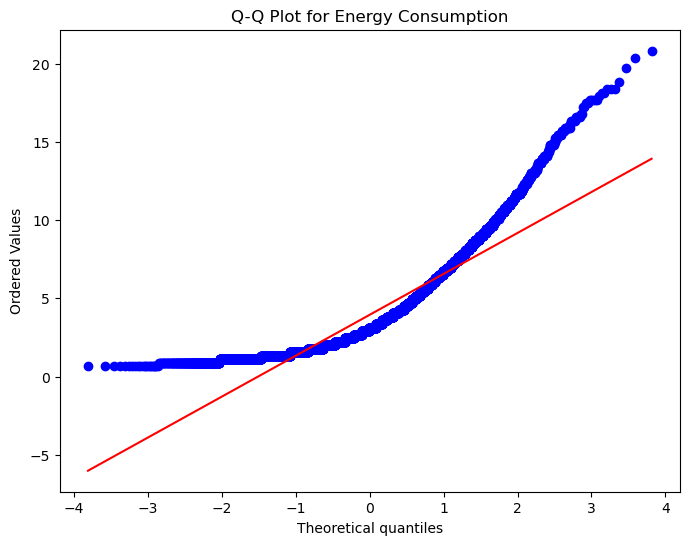

In [28]:
energy_consumption = df['Trip Energy Consumption']

plt.figure(figsize=(8, 6))
stats.probplot(energy_consumption, dist="norm", plot=plt)
plt.title("Q-Q Plot for Energy Consumption")
plt.show()


The Q-Q plot for energy consumption suggests a significant deviation from normality.In this plot, if the energy consumption values followed a normal distribution, the data points (in blue) would align closely along the red diagonal line. However, we observe that the points deviate upwards and downwards, especially in the tails.This indicates a heavy-tailed distribution with positive skewness, as the upper tail diverges sharply above the line, and there are several high-energy consumption values that extend far from the theoretical quantiles of a normal distribution.

<Axes: xlabel='Trip Distance', ylabel='Count'>

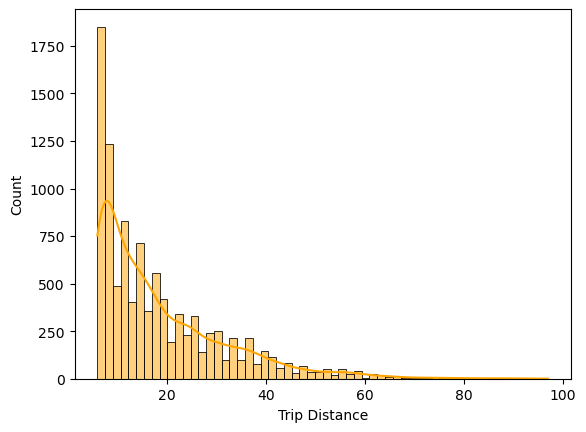

In [30]:
sns.histplot(df['Trip Distance'], kde=True,color='orange')


* The histogram with a KDE overlay for "Trip Distance" shows a highly right-skewed distribution.
* Most trips are concentrated in the lower distance range, specifically between 0 and 20 units.
* There is a steep drop-off in trip frequency as the distance increases.
* This indicates that the dataset predominantly consists of shorter trips, with fewer longer trips recorded.

<Axes: xlabel='Trip Energy Consumption', ylabel='Count'>

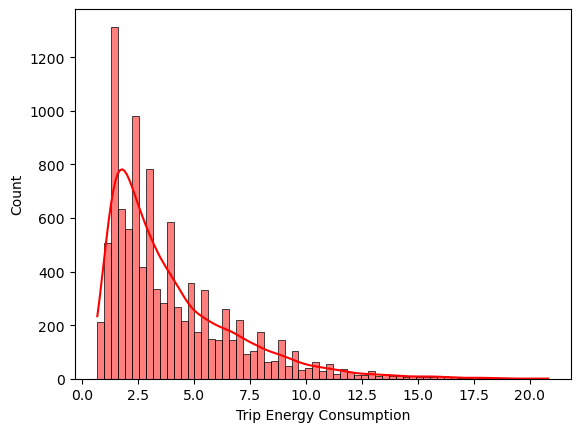

In [34]:
sns.histplot(df['Trip Energy Consumption'], kde=True,color='red')

* The histogram with a kernel density estimate (KDE) for "Trip Energy Consumption" shows a strong right-skew, similar to the distribution of "Trip Distance."
* Most values are concentrated in the lower range, around 0 to 5 units of energy consumption, with the frequency declining as energy consumption increases.
* This indicates that a large portion of trips consume relatively low amounts of energy, while higher energy consumption is less  common, though it does occur occasionally as seen in the long tail extending to the right.

<Axes: xlabel='Trip Energy Consumption', ylabel='Speed'>

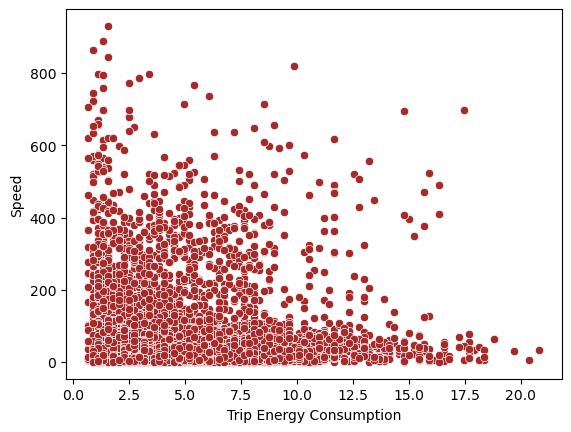

In [37]:
sns.scatterplot(x=df['Trip Energy Consumption'], y=df['Speed'],color='brown')

* From the scatter plot, we observe that as trip energy consumption increases, the range of observed speeds tends to decrease, especially at higher energy consumption levels.
* Most points are concentrated between 0.5 and 2.0 on the x-axis, where we see a wide spread of speeds, indicating that lower and medium energy consumption trips occur at a variety of speeds. 

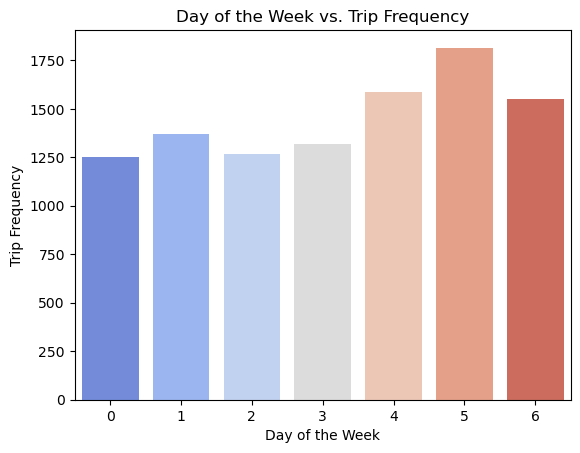

In [40]:
sns.countplot(x='Day of the Week', data=df, palette='coolwarm')
plt.title('Day of the Week vs. Trip Frequency')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Frequency')
plt.show()


* The bar chart displays the frequency of trips across different days of the week. 
* From this plot, we can observe some variation in trip frequency depending on the day. 
* The days labeled 5 and 6 (likely representing Friday and Saturday) have the highest trip counts, indicating a possible increase in travel on these days, which could be attributed to end-of-week activities or weekend travel patterns.
* In contrast, days labeled 0 to 3 (Sunday to Wednesday) generally show lower frequencies, suggesting that fewer trips occur earlier in the week.

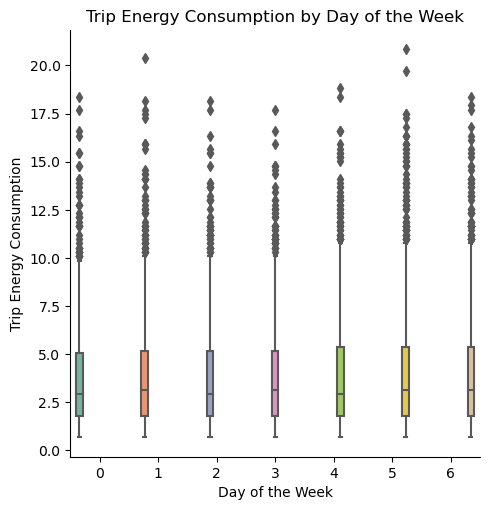

In [43]:
sns.catplot(x='Day of the Week', y='Trip Energy Consumption', data=df, kind='box', hue='Day of the Week', palette='Set2')

plt.title('Trip Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Energy Consumption')

plt.show()


* The box plot illustrates trip energy consumption across different days of the week, represented numerically from 0 to 6 on the x-axis. 
* The y-axis measures trip energy consumption levels, potentially in kilowatt-hours (kWh), with values ranging from 0 up to around 20. 
* Each box plot for the individual days provides a detailed look at the data’s distribution, showing the median trip energy consumption as the central line within each box. 
* The boxes represent the interquartile range (IQR), capturing the middle 50% of data points, while the whiskers extend to display variability outside this range.
* Points beyond the whiskers are marked as outliers, indicating trips with significantly higher energy consumption than usual.

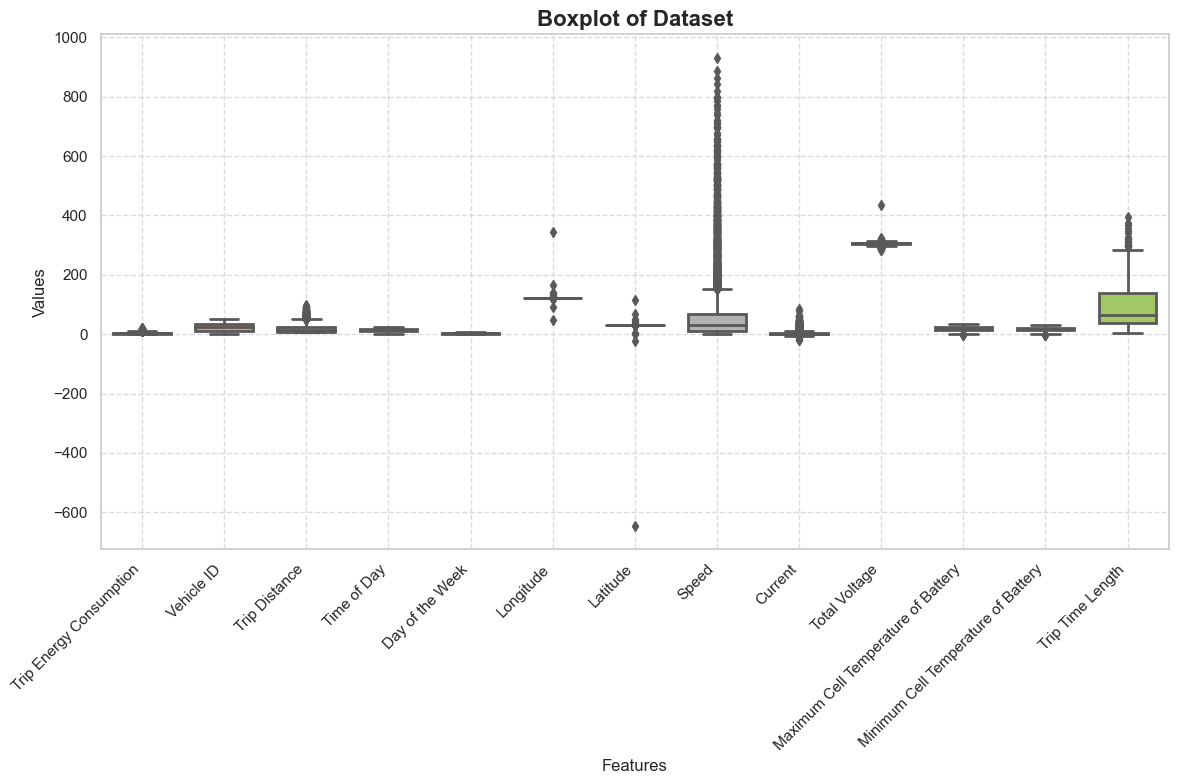

In [46]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

sns.boxplot(data=df, palette="Set2", width=0.7, linewidth=2)

plt.xticks(rotation=45, ha="right")

plt.title("Boxplot of Dataset", fontsize=16, weight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The boxplot provided showcases the distribution of several dataset features, highlighting both the range of values and the presence of outliers. Each feature on the x-axis represents a different variable, such as "Vehicle ID," "Trip Distance," "Speed," and "Trip energy consumption_log," with their corresponding values plotted on the y-axis. From this plot, it's evident that some features, like "Speed," exhibit a broad range with many positive outliers, indicating high variability and some extremely high values, while others, such as "Vehicle ID" and "Total Voltage," show a much tighter spread and fewer outliers.

<Axes: xlabel='Speed'>

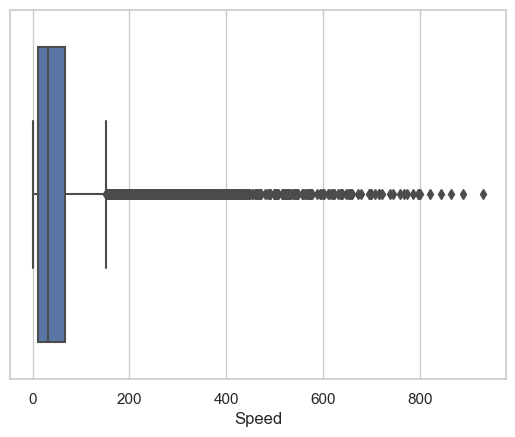

In [48]:
sns.boxplot(x=df['Speed'])

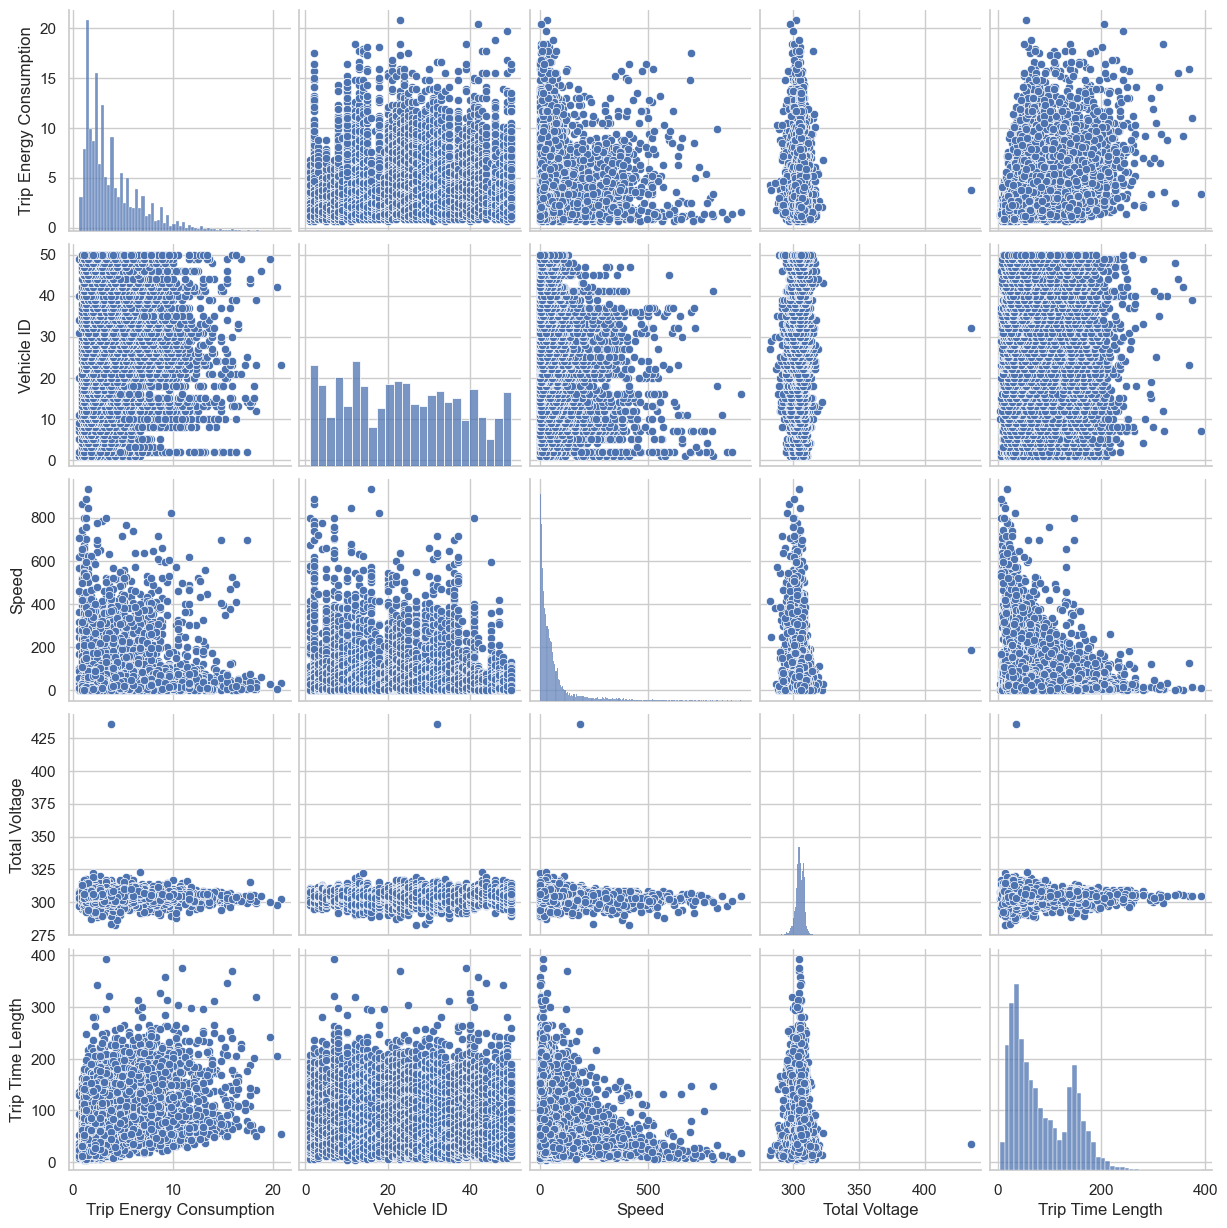

In [50]:
sns.pairplot(df[['Trip Energy Consumption','Vehicle ID','Speed','Total Voltage','Trip Time Length']])


The pairplot illustrates relationships among several key variables: "Trip energy_consumption_log," "Vehicle ID," "Speed," "Total Voltage," and "Trip Time Length." Diagonal plots show the distribution of each variable, with "Trip energy_consumption_log" and "Trip Time Length" following somewhat skewed distributions.

The "Trip energy_consumption_log" appears to increase with "Trip Time Length," suggesting that longer trips are associated with higher energy consumption. Similarly, "Speed" and "Trip Time Length" show a general trend where higher speeds are linked with shorter trip times, likely because higher speed reduces travel duration.

<Axes: >

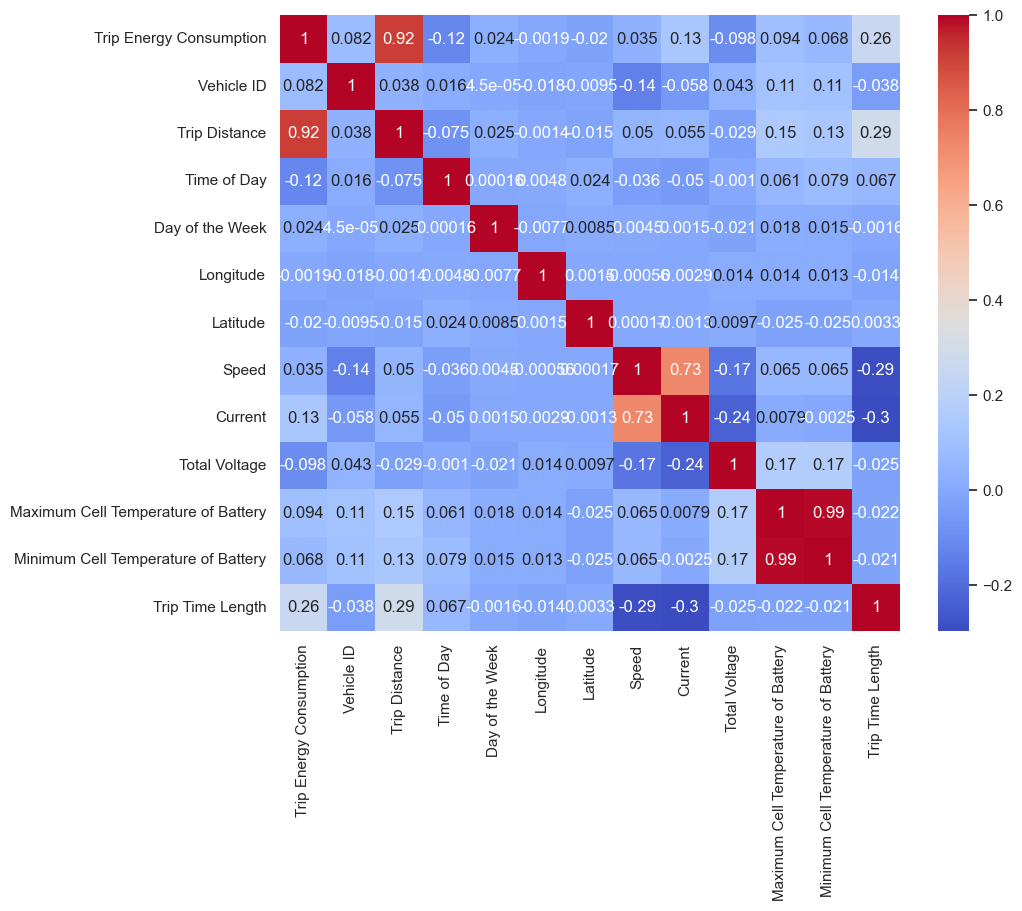

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


The correlation heatmap provides insights into the relationships between different features in the dataset. A value close to 1 indicates a strong positive correlation, while values closer to -1 show a strong negative correlation. Here, "Maximum Cell Temperature of Battery" and "Minimum Cell Temperature of Battery" display a moderate positive correlation, suggesting they tend to increase together. "Trip energy consumption_log" has some positive correlation with "Trip Time Length" and "Speed," indicating that longer and faster trips consume more energy.

## Normalization of Trip Energy Consumption

In [56]:
df['Trip Energy Consumption log'] = np.log(df['Trip Energy Consumption']+1)

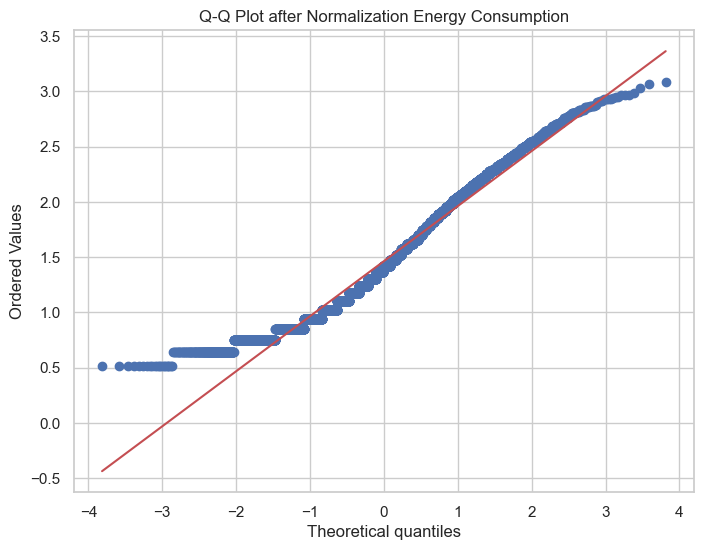

In [57]:
energy_consumption = df['Trip Energy Consumption log']

plt.figure(figsize=(8, 6))
stats.probplot(energy_consumption, dist="norm", plot=plt)
plt.title("Q-Q Plot after Normalization Energy Consumption")
plt.show()

* The Q-Q plot for energy consumption after applying the logarithmic transformation shows an improved alignment with the red diagonal line, indicating a closer approximation to a normal distribution.
* The points now follow the line more closely, especially in the central portion, suggesting that the log transformation has effectively reduced the skewness and mitigated the impact of extreme values that were present in the original distribution.
* However, there are still some deviations in the tails, especially in the upper range, where a few points drift slightly above the line.
* This indicates that while the data is now more normalized, it still retains some slight non-normal characteristics in the extremes.

In [59]:
df.drop('Trip Energy Consumption',axis=1,inplace=True)

In [150]:
df.head()

,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length,Trip Energy Consumption log
0,1,6,10.333333,4,121.497948,31.281574,246.000000,2.583348,308.283333,31.000000,30.833333,13,0.514021
1,1,6,16.000000,4,121.587564,31.256070,393.714286,2.985729,304.485714,29.000000,28.000000,18,0.639746
2,1,7,16.090909,2,121.576968,31.262034,192.000000,2.354560,308.463636,31.272727,30.000000,21,0.851859
3,1,8,19.000000,5,121.549709,31.257796,369.240000,1.540015,308.060000,30.000000,30.000000,16,0.851859
4,1,6,14.166667,6,121.582280,31.215030,413.450617,9.659892,304.473457,28.000000,28.000000,129,0.639746


# Outlier Detection and Handling in Speed Data

### Calculating Upper and Lower Limits for Speed Data to Detect Outliers

In [62]:
upper_limit = df['Speed'].mean() + 3 * df['Speed'].std()
lower_limit = df['Speed'].mean() - 3 * df['Speed'].std()

print(f"upper limit : {upper_limit}")
print(f"lower limit : {lower_limit}")

upper limit : 344.8710715442136
lower limit : -220.5464209645054


In [63]:
df.loc[(df['Speed']>upper_limit) | (df['Speed']<lower_limit)]

,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length,Trip Energy Consumption log
1,1,6,16.000000,4,121.587564,31.256070,393.714286,2.985729,304.485714,29.000000,28.000000,18,0.639746
3,1,8,19.000000,5,121.549709,31.257796,369.240000,1.540015,308.060000,30.000000,30.000000,16,0.851859
4,1,6,14.166667,6,121.582280,31.215030,413.450617,9.659892,304.473457,28.000000,28.000000,129,0.639746
6,1,6,14.000000,2,121.507915,31.281330,671.333333,11.783349,302.666667,29.750000,27.666667,9,0.751416
10,1,8,16.000000,4,121.572640,31.211389,559.275862,-1.999985,304.689655,31.000000,30.000000,21,0.639746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,41,29,20.975610,2,121.363893,31.241634,385.902439,22.209772,298.256098,17.365854,16.487805,46,1.984031
9346,45,7,10.461538,3,121.576321,31.165892,595.384615,27.176938,302.346154,23.000000,22.000000,10,0.851859
9363,45,8,10.000000,1,121.595337,31.241427,357.166667,25.216683,299.275000,15.000000,15.000000,15,0.943127
9562,47,6,18.000000,3,121.417824,31.121190,416.437500,5.256265,308.668750,27.000000,26.437500,13,0.639746


After applying outlier detection methods, a total of 286 rows containing outliers have been identified in the 'Speed' data across 13 columns.

In [65]:
threshold = 3

df.loc[(stats.zscore(df['Speed']).abs() > threshold)]


,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length,Trip Energy Consumption log
1,1,6,16.000000,4,121.587564,31.256070,393.714286,2.985729,304.485714,29.000000,28.000000,18,0.639746
3,1,8,19.000000,5,121.549709,31.257796,369.240000,1.540015,308.060000,30.000000,30.000000,16,0.851859
4,1,6,14.166667,6,121.582280,31.215030,413.450617,9.659892,304.473457,28.000000,28.000000,129,0.639746
6,1,6,14.000000,2,121.507915,31.281330,671.333333,11.783349,302.666667,29.750000,27.666667,9,0.751416
10,1,8,16.000000,4,121.572640,31.211389,559.275862,-1.999985,304.689655,31.000000,30.000000,21,0.639746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,41,29,20.975610,2,121.363893,31.241634,385.902439,22.209772,298.256098,17.365854,16.487805,46,1.984031
9346,45,7,10.461538,3,121.576321,31.165892,595.384615,27.176938,302.346154,23.000000,22.000000,10,0.851859
9363,45,8,10.000000,1,121.595337,31.241427,357.166667,25.216683,299.275000,15.000000,15.000000,15,0.943127
9562,47,6,18.000000,3,121.417824,31.121190,416.437500,5.256265,308.668750,27.000000,26.437500,13,0.639746


After z_score methods, a total of 286 rows containing outliers have been identified in the 'Speed' data across 13 columns.Both methods are giving the same number of outliers

## Filtering Outliers from Speed Data Based on Calculated Limits

In [68]:
new_df = df.loc[(df['Speed']<upper_limit) & (df['Speed']>lower_limit)]

In [69]:
new_df

,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length,Trip Energy Consumption log
0,1,6,10.333333,4,121.497948,31.281574,246.000000,2.583348,308.283333,31.000000,30.833333,13,0.514021
2,1,7,16.090909,2,121.576968,31.262034,192.000000,2.354560,308.463636,31.272727,30.000000,21,0.851859
5,1,6,18.548387,6,121.589980,31.284238,175.838710,-1.912888,304.648387,29.000000,29.000000,18,0.851859
7,1,12,9.675676,3,121.559338,31.260084,337.945946,6.072988,308.821622,30.000000,29.000000,21,1.175573
8,1,9,19.000000,3,121.556343,31.258021,275.500000,8.823825,307.964286,31.000000,30.571429,27,0.851859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10146,50,36,14.500000,1,121.325082,31.263657,68.500000,1.570015,304.590000,30.100000,30.100000,65,1.952744
10147,50,28,0.325000,2,121.269958,31.343371,46.925000,5.135015,309.820000,30.000000,28.325000,54,1.920446
10148,50,43,1.562500,2,121.411333,31.053128,23.562500,1.743765,305.577083,30.000000,28.708333,65,2.179287
10149,50,18,21.808511,2,121.467157,30.854289,19.276596,1.334057,308.397872,22.787234,22.574468,84,1.615818


After filtering outliers from the 'Speed' data based on the calculated upper and lower limits, the dataset now contains 9865 rows and 13 columns.

## After Filtering the outliers

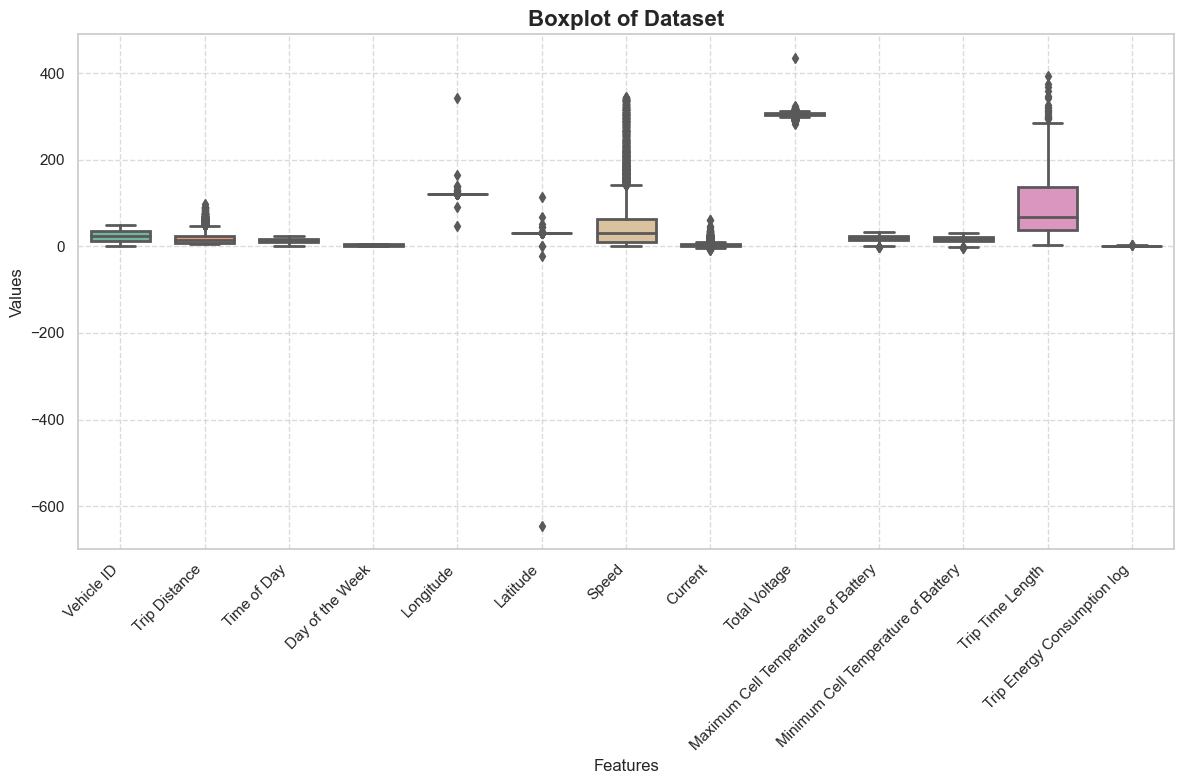

In [72]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

sns.boxplot(data=new_df, palette="Set2", width=0.7, linewidth=2)

plt.xticks(rotation=45, ha="right")

plt.title("Boxplot of Dataset", fontsize=16, weight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Axes: xlabel='Speed'>

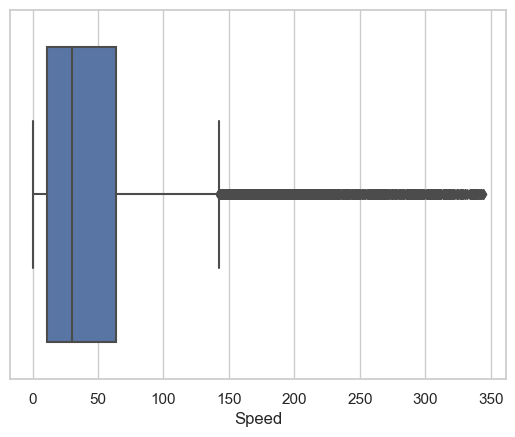

In [73]:
sns.boxplot(x=new_df['Speed'])

## Preparing Data for Model: Splitting Features and Target Variable

In [75]:
x = new_df.drop('Trip Energy Consumption log',axis=1)
y = new_df['Trip Energy Consumption log']

The dataset has been split into features (X) and target variable (y) in preparation for modeling.

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

The data has been split into training and testing sets using the train_test_split

In [79]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)


Training set shape: (7892, 12) (7892,)
Testing set shape: (1973, 12) (1973,)


The shapes of the training and testing sets have been printed to verify the data split

## Scaling Features Using StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
new_df.columns

Index(['Vehicle ID', 'Trip Distance', 'Time of Day', 'Day of the Week',
       'Longitude', 'Latitude', 'Speed', 'Current', 'Total Voltage',
       'Maximum Cell Temperature of Battery',
       'Minimum Cell Temperature of Battery', 'Trip Time Length',
       'Trip Energy Consumption log'],
      dtype='object')

## Applying StandardScaler to Selected Features in Training and Test Data

In [87]:
columns_to_scale = ['Trip Distance', 'Speed', 'Current', 'Total Voltage', 
                    'Maximum Cell Temperature of Battery', 'Minimum Cell Temperature of Battery',
                   'Trip Time Length']

x_train[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])

x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

This code demonstrates how to apply feature scaling using StandardScaler to specific features in the training (x_train) and test (x_test) datasets. The selected columns ('Trip Distance', 'Speed', 'Current', 'Total Voltage', 'Maximum Cell Temperature of Battery', 'Minimum Cell Temperature of Battery', and 'Trip Time Length') are standardized by first fitting the scaler to the training data and then transforming both the training and test datasets.

In [95]:
print("Scaled Training Data:\n", x_train)
print("\nScaled Test Data:\n", x_test)

Scaled Training Data:
       Vehicle ID  Trip Distance  Time of Day  Day of the Week   Longitude  \
3680          16      -0.106497    18.000000                2  121.549232   
6257          29      -0.960082    21.116279                2  121.204856   
9217          43       0.281497    19.736842                0  121.219273   
9265          44      -0.727286     9.818182                0  121.239895   
6646          30      -0.028898     6.142857                6  121.518119   
...          ...            ...          ...              ...         ...   
5943          27       3.152646    15.965517                5  121.284524   
5388          25      -0.572088     8.448276                6  121.219996   
5590          25      -0.261694    22.777778                5  121.434751   
926            5      -0.882483    16.257143                2  121.494449   
7511          34       1.212680     0.650000                1  121.414187   

       Latitude     Speed   Current  Total Voltage  

 ## Feature Selection Using SelectKBest with f_regression for Regression Tasks

In [100]:
selector = SelectKBest(score_func=f_regression, k=5)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

selected_columns = x.columns[selector.get_support(indices=True)]
print("Selected features:", selected_columns)

Selected features: Index(['Trip Distance', 'Time of Day', 'Current',
       'Maximum Cell Temperature of Battery', 'Trip Time Length'],
      dtype='object')


In this code, feature selection is performed using SelectKBest with the f_regression scoring function.The SelectKBest method is used to select the top 5 features (k=5) that have the highest correlation with the target variable (y_train). The selected features are then printed by using the get_support() method, which returns the indices of the selected features, and those indices are used to retrieve the corresponding column names. 

## Model Selection and Comparison for Regression Tasks

In [112]:
models = {
    LinearRegression() : " Linear Regression",
    DecisionTreeRegressor(): "Decision Trees Regressor",
    RandomForestRegressor() : "Random Forest Regressor",
    SVR() : "Support Vector Regressor",
    GradientBoostingRegressor() : "Gradient Boosting Regressor"
}


## Model Building and Evaluation for Regression

In [115]:
def model_building(model):
    for i in model:
        i.fit(x_train_selected,y_train)
        y_prediction = i.predict(x_test_selected)
        print("model name :",i)
        print("mean square error:",mean_squared_error(y_test,y_prediction))
        print("mean absolute error:",mean_absolute_error(y_test,y_prediction))
        print("r2 score:",r2_score(y_test,y_prediction))
        print("\n")

    
model_building(models)


model name : LinearRegression()
mean square error: 0.049002868971637845
mean absolute error: 0.17307851408200076
r2 score: 0.8109908478599539


model name : DecisionTreeRegressor()
mean square error: 0.06305264381968055
mean absolute error: 0.19152292412362393
r2 score: 0.7567994078990797


model name : RandomForestRegressor()
mean square error: 0.033674856464631434
mean absolute error: 0.1434012380338671
r2 score: 0.8701125831530063


model name : SVR()
mean square error: 0.03360513285222852
mean absolute error: 0.14267316021616777
r2 score: 0.8703815143633818


model name : GradientBoostingRegressor()
mean square error: 0.030361676709766056
mean absolute error: 0.13697310651037561
r2 score: 0.8828918613768408




This code defines a function model_building that takes a dictionary of regression models as input, trains each model using the x_train_selected features and y_train target values, and evaluates its performance on the x_test_selected dataset. For each model, it calculates and prints key performance metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score. These metrics help assess the model's accuracy and fit for the regression task. The function outputs the evaluation results for each model, making it easy to compare the performance of different models and choose the best one.

## Best Model Selection Based on Performance Metrics

In [118]:
def best_model(model):
    best_r2_score = float("-inf")
    lowest_mse = float("inf")
    best_model_name = ""
    
    for i,model_name in model.items():
        i.fit(x_train_selected,y_train)
        y_predictions = i.predict(x_test_selected)
        r2 = r2_score(y_predictions,y_test)
        mse = mean_squared_error(y_predictions,y_test)
        
        if r2 > best_r2_score or (r2 == best_r2_score and mse < lowest_mse):
            best_model_name = model_name
            best_r2_score = r2
            lowest_mse = mse
            
    return best_model_name,best_r2_score,lowest_mse

best_model_name,best_r2_score,lowest_mse=best_model(models)
print("Best model is:", best_model_name)
print("With R² score:", best_r2_score)
print("With lowest Mean Squared Error:", lowest_mse)

Best model is: Gradient Boosting Regressor
With R² score: 0.8641150642203826
With lowest Mean Squared Error: 0.03035048762776306


This function best_model is designed to evaluate a dictionary of regression models and select the best model based on its performance metrics. It compares the R² score and Mean Squared Error (MSE) for each model, updating the best model whenever a higher R² score is found or if the R² score is the same but the MSE is lower. The function iterates through each model, fits it to the training data (x_train_selected and y_train), makes predictions on the test data (x_test_selected), and calculates both the R² score and MSE. It returns the name of the best model, the highest R² score, and the lowest MSE for easy comparison. The result is printed with the name of the best model, its R² score, and its MSE.`m

#  Best Model Selection for Energy Consumption Analysis in Electric Vehicles

The Gradient Boosting Regressor has been identified as the best model for predicting energy consumption in electric vehicles based on the given dataset. With an R² score of 0.8641, it explains approximately 86.41% of the variance in the target variable. Additionally, it achieved the lowest Mean Squared Error (MSE) of 0.0304, indicating that the model's predictions are close to the actual values. These performance metrics suggest that the Gradient Boosting Regressor is highly effective for this problem.

# Energy Consumption Prediction Using Gradient Boosting Regressor

In [152]:
x_train = new_df[['Trip Distance', 'Time of Day', 'Current','Maximum Cell Temperature of Battery', 'Trip Time Length']]  
y_train = new_df['Trip Energy Consumption log'] 


model = GradientBoostingRegressor()
model.fit(x_train, y_train)  

scaler = StandardScaler()
scaler.fit(x_train)

selected_columns = x_train.columns

def get_prediction():
    user_input = []
    
    print("Enter the following details:")
    
    for feature in selected_columns: 
        value = float(input(f"{feature}: ")) 
        user_input.append(value)
    
    user_input = np.array(user_input).reshape(1, -1)
    
    user_input_scaled = scaler.transform(user_input)
    
    prediction = model.predict(user_input_scaled)
    
    print(f"Predicted Energy Consumption: {prediction[0]}")

get_prediction()

Enter the following details:


Trip Distance:  6
Time of Day:  10.33
Current:  2.583348
Maximum Cell Temperature of Battery:  31
Trip Time Length:  30


Predicted Energy Consumption: 0.9758330841549185


This code implements a machine learning model to predict energy consumption for trips using key features such as Trip Distance, Time of Day, Current, Maximum Cell Temperature of the Battery, and Trip Time Length. The data is first standardized using StandardScaler to ensure consistent scaling of the input features. The Gradient Boosting Regressor is trained on the provided dataset, with the selected features as inputs and energy consumption (log-transformed) as the target variable. The script also includes a function that allows users to input feature values interactively. These values are scaled and passed to the trained model, which then predicts and outputs the trip's energy consumption. This approach provides an interactive and efficient way to estimate energy usage based on trip parameters.